# Look at the sampling pattern for expected improvement
David Eriksson <dme65@cornell.edu>

In [1]:
from pySOT.auxiliary_problems import expected_improvement_ga, ei_merit
from pySOT.surrogate import GPRegressor
from pySOT.optimization_problems import Ackley
import numpy as np

import matplotlib.pylab as plt
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

## Use the 1-dimensional Ackley function

In [2]:
ackley = Ackley(dim=1)

## Use 5 initial points

In [3]:
X = np.expand_dims([-15, -10, 0, 1, 20], axis=1)
npts = len(X)
fX = np.array([ackley.eval(x) for x in X])

gp = GPRegressor(dim=1)
for i in range(npts):
    gp.add_points(X[i,:], fX[i])

## Predict function values and compute minimum distances for a linspace

In [4]:
XX = np.expand_dims(np.linspace(ackley.lb, ackley.ub, 500), axis=1)
fXX = np.array([ackley.eval(x) for x in XX])
fvals = gp.predict(XX)

## Compute EI on linspace and find the maximizer using a GA

In [5]:
ei = ei_merit(XX, gp, fX, XX, 0)
x_best = expected_improvement_ga(X=X, Xpend=None, dtol=0.0, ei_tol=0, \
                                 fX=fX, num_pts=1, opt_prob=ackley, surrogate=gp)
ei_best = ei_merit(x_best, gp, fX, XX, 0)

# Set the minimum distance to 5
x_best2 = expected_improvement_ga(X=X, Xpend=None, dtol=5.0, ei_tol=0, \
                                 fX=fX, num_pts=1, opt_prob=ackley, surrogate=gp)
ei_best2 = ei_merit(x_best2, gp, fX, XX, 0)

## Plot mean prediction, upper and lower bounds, and expected improvement

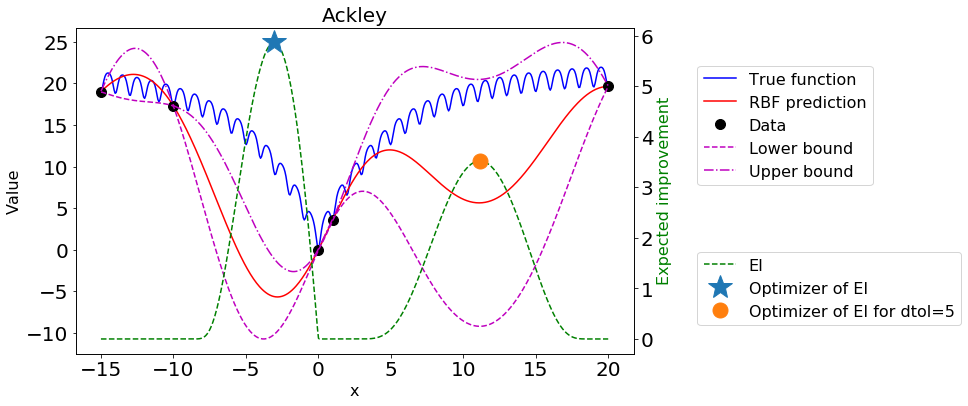

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(XX, fXX, 'b')
plt.plot(XX, gp.predict(XX), 'r')
plt.plot(X, fX, 'k.', markersize=20)
plt.plot(XX, gp.predict(XX) - gp.predict_std(XX), 'm--')
plt.plot(XX, gp.predict(XX) + gp.predict_std(XX), 'm-.')
plt.legend(["True function", "RBF prediction", "Data", 
            "Lower bound", "Upper bound"], 
           loc='center left', bbox_to_anchor=(1.1, 0.7), fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.xlabel("x", fontsize=16)
plt.title("Ackley", fontsize=20)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(XX, ei, 'g--')
plt.plot(x_best, ei_best, '*', markersize=25)
plt.plot(x_best2, ei_best2, 'o', markersize=15)
ax2.set_ylabel('Expected improvement', color='g', fontsize=16)
ax2.legend(["EI", "Optimizer of EI", "Optimizer of EI for dtol=5"], loc='center left', \
           bbox_to_anchor=(1.1, 0.2), fontsize=16)

plt.show()